In [1]:
file_path = !pwd  #%cd%
print(file_path)

['/home/jujubinha/opensubtitle']


In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np
import requests
import base64
import gzip

In [3]:
for dataset in ['basics','ratings']: #,'akas']:
    raw_data = requests.get('https://datasets.imdbws.com/title.'+dataset+'.tsv.gz')
    with open(dataset+'.gz', 'wb+') as file:
        file.write(raw_data.content)
    df = pd.read_csv(dataset+'.gz', compression='gzip', sep=r'\t', engine='python')
    df.to_pickle(dataset+'.pickle')

In [4]:
basics = pd.read_pickle('basics.pickle')
ratings = pd.read_pickle('ratings.pickle')
#akas = pd.read_pickle('akas.pickle')

In [5]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1486
1,tt0000002,6.4,179
2,tt0000003,6.6,1119
3,tt0000004,6.4,109
4,tt0000005,6.2,1822


In [7]:
final = pd.merge(basics,ratings, on='tconst')

In [8]:
final.plot.scatter('averageRating','numVotes',alpha=0.1, figsize=(15,15))

In [9]:
final.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear          object
endYear            object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [10]:
#final['genres'] = final['genres'].str.split(',')

In [11]:
final.titleType.unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [12]:
def arruma(series):
    return pd.to_numeric(series, errors='coerse', downcast ='integer') #.fillna(0).astype(int).replace(0,'')

In [13]:
final['isAdult'] = final['isAdult'].astype(bool)
final['runtimeMinutes'] = arruma(final['runtimeMinutes'])
final['startYear'] = arruma(final['startYear'])
final['endYear'] = arruma(final['endYear'])

In [14]:
final.to_pickle('final.pickle')
final.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult              bool
startYear         float64
endYear           float64
runtimeMinutes    float64
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [15]:
final

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,False,1894.0,NaN,1.0,"Documentary,Short",5.8,1486
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,False,1892.0,NaN,5.0,"Animation,Short",6.4,179
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,False,1892.0,NaN,4.0,"Animation,Comedy,Romance",6.6,1119
3,tt0000004,short,Un bon bock,Un bon bock,False,1892.0,NaN,NaN,"Animation,Short",6.4,109
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,False,1893.0,NaN,1.0,"Comedy,Short",6.2,1822
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,False,1894.0,NaN,1.0,Short,5.6,96
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,False,1894.0,NaN,1.0,"Short,Sport",5.5,596
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,False,1894.0,NaN,1.0,"Documentary,Short",5.6,1587
8,tt0000009,movie,Miss Jerry,Miss Jerry,False,1894.0,NaN,45.0,Romance,5.5,77
9,tt0000010,short,Exiting the Factory,La sortie de l'usine Lumière à Lyon,False,1895.0,NaN,1.0,"Documentary,Short",6.9,5287


In [16]:
movie = final[final.titleType == 'movie']
movie

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,False,1894.0,NaN,45.0,Romance,5.5,77
143,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897.0,NaN,20.0,"Documentary,News,Sport",5.2,290
237,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,False,1900.0,NaN,NaN,"Biography,Drama",6.3,39
343,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906.0,NaN,70.0,"Biography,Crime,Drama",6.2,505
361,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,False,1907.0,NaN,NaN,Drama,4.8,14
367,tt0000630,movie,Hamlet,Amleto,False,1908.0,NaN,NaN,Drama,2.9,11
394,tt0000675,movie,Don Quijote,Don Quijote,False,1908.0,NaN,NaN,Drama,4.3,10
395,tt0000676,movie,Don Álvaro o la fuerza del sino,Don Álvaro o la fuerza del sino,False,1908.0,NaN,NaN,Drama,3.8,8
396,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,False,1908.0,NaN,120.0,"Adventure,Fantasy",4.8,33
428,tt0000739,movie,El pastorcito de Torrente,El pastorcito de Torrente,False,1908.0,NaN,NaN,Drama,6.1,8


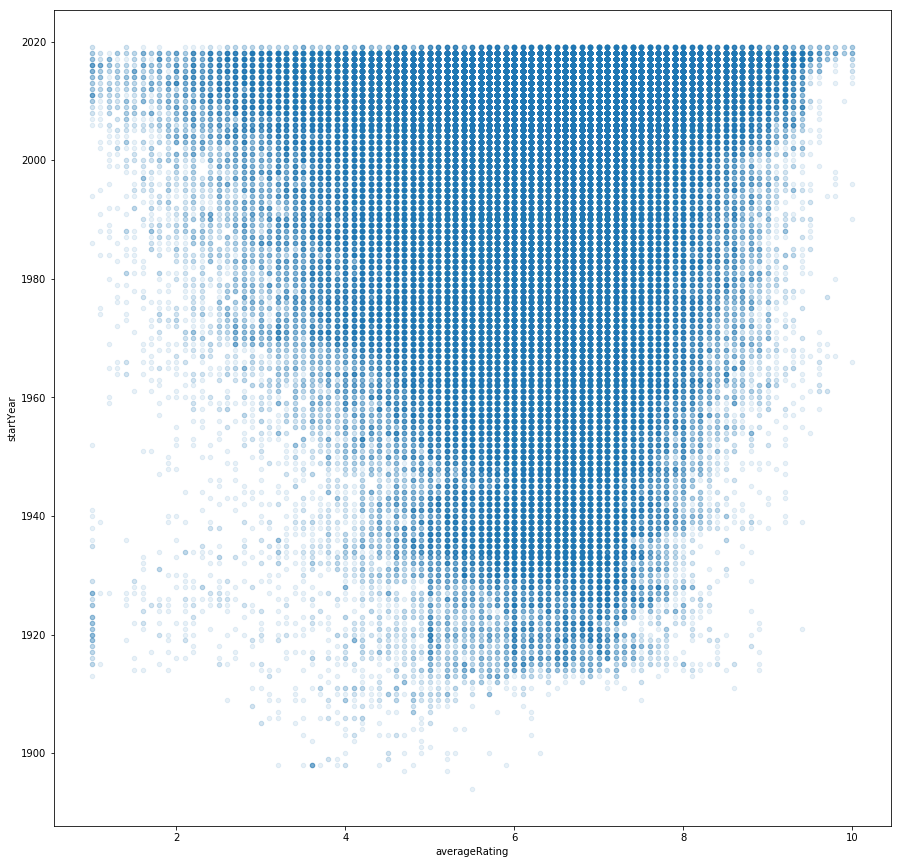

In [27]:
movie.plot.scatter('averageRating','startYear',alpha=0.1, figsize=(15,15))

In [18]:
def onehot(df):
    categories = []
    lista = list(df['genres'].unique())
    for cat in lista:
        for c in cat.split(','):
            if c not in categories:
                if c != '\\N':
                    categories.append(c)
    for c in categories:
        df['genre_'+c] = df['genres'].apply(lambda x: 1 if c in x else 0)
    return df

In [19]:
m = onehot(movie)
m

/home/jujubinha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,genre_Romance,genre_Documentary,genre_News,genre_Sport,genre_Biography,genre_Drama,genre_Crime,genre_Adventure,genre_Fantasy,genre_Comedy,genre_War,genre_Family,genre_History,genre_Sci-Fi,genre_Thriller,genre_Mystery,genre_Horror,genre_Action,genre_Western,genre_Music,genre_Animation,genre_Musical,genre_Short,genre_Film-Noir,genre_Talk-Show,genre_Adult,genre_Reality-TV,genre_Game-Show
8,tt0000009,movie,Miss Jerry,Miss Jerry,False,1894.0,NaN,45.0,Romance,5.5,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897.0,NaN,20.0,"Documentary,News,Sport",5.2,290,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
237,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,False,1900.0,NaN,NaN,"Biography,Drama",6.3,39,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
343,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906.0,NaN,70.0,"Biography,Crime,Drama",6.2,505,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
361,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,False,1907.0,NaN,NaN,Drama,4.8,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
367,tt0000630,movie,Hamlet,Amleto,False,1908.0,NaN,NaN,Drama,2.9,11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
394,tt0000675,movie,Don Quijote,Don Quijote,False,1908.0,NaN,NaN,Drama,4.3,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
395,tt0000676,movie,Don Álvaro o la fuerza del sino,Don Álvaro o la fuerza del sino,False,1908.0,NaN,NaN,Drama,3.8,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,False,1908.0,NaN,120.0,"Adventure,Fantasy",4.8,33,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,tt0000739,movie,El pastorcito de Torrente,El pastorcito de Torrente,False,1908.0,NaN,NaN,Drama,6.1,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
m.describe(include='all')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,genre_Romance,genre_Documentary,genre_News,genre_Sport,genre_Biography,genre_Drama,genre_Crime,genre_Adventure,genre_Fantasy,genre_Comedy,genre_War,genre_Family,genre_History,genre_Sci-Fi,genre_Thriller,genre_Mystery,genre_Horror,genre_Action,genre_Western,genre_Music,genre_Animation,genre_Musical,genre_Short,genre_Film-Noir,genre_Talk-Show,genre_Adult,genre_Reality-TV,genre_Game-Show
count,232382,232382,232382,232382,232382,232369.000000,0.0,203722.000000,232382,232382.000000,2.323820e+05,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.00000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000,232382.000000
unique,232382,1,209088,214717,2,NaN,NaN,NaN,1240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,tt0879224,movie,Hamlet,Hamlet,False,NaN,NaN,NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,232382,24,22,228436,NaN,NaN,NaN,39453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1990.587256,NaN,94.028181,NaN,6.229305,3.192833e+03,0.111343,0.135097,0.002707,0.011124,0.029047,0.438278,0.084585,0.066408,0.028483,0.253488,0.022218,0.038088,0.026228,0.024223,0.079085,0.03564,0.067652,0.105929,0.017850,0.046406,0.016034,0.023573,0.000026,0.003275,0.000009,0.015935,0.000116,0.000009
std,NaN,NaN,NaN,NaN,NaN,25.398874,NaN,123.160258,NaN,1.342428,2.993927e+04,0.314557,0.341827,0.051956,0.104882,0.167939,0.496177,0.278264,0.248994,0.166349,0.435009,0.147391,0.191410,0.159814,0.153741,0.269872,0.18539,0.251148,0.307747,0.132406,0.210364,0.125606,0.151716,0.005081,0.057132,0.002934,0.125224,0.010778,0.002934
min,NaN,NaN,NaN,NaN,NaN,1894.000000,NaN,1.000000,NaN,1.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1974.000000,NaN,81.000000,NaN,5.400000,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,2000.000000,NaN,91.000000,NaN,6.400000,4.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,102.000000,NaN,7.100000,2.450000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
m['output'] = pd.Series(0)
for c in list(m.columns[m.columns.str.startswith('genre_')]):
    m['output'] = m[c].astype(str) + m['output'].astype(str)

/home/jujubinha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jujubinha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
m

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,genre_Romance,genre_Documentary,genre_News,genre_Sport,genre_Biography,genre_Drama,genre_Crime,genre_Adventure,genre_Fantasy,genre_Comedy,genre_War,genre_Family,genre_History,genre_Sci-Fi,genre_Thriller,genre_Mystery,genre_Horror,genre_Action,genre_Western,genre_Music,genre_Animation,genre_Musical,genre_Short,genre_Film-Noir,genre_Talk-Show,genre_Adult,genre_Reality-TV,genre_Game-Show,output
8,tt0000009,movie,Miss Jerry,Miss Jerry,False,1894.0,NaN,45.0,Romance,5.5,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0000000000000000000000000001nan
143,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897.0,NaN,20.0,"Documentary,News,Sport",5.2,290,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0000000000000000000000001110nan
237,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,False,1900.0,NaN,NaN,"Biography,Drama",6.3,39,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0000000000000000000000110000nan
343,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906.0,NaN,70.0,"Biography,Crime,Drama",6.2,505,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0000000000000000000001110000nan
361,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,False,1907.0,NaN,NaN,Drama,4.8,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0000000000000000000000100000nan
367,tt0000630,movie,Hamlet,Amleto,False,1908.0,NaN,NaN,Drama,2.9,11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0000000000000000000000100000nan
394,tt0000675,movie,Don Quijote,Don Quijote,False,1908.0,NaN,NaN,Drama,4.3,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0000000000000000000000100000nan
395,tt0000676,movie,Don Álvaro o la fuerza del sino,Don Álvaro o la fuerza del sino,False,1908.0,NaN,NaN,Drama,3.8,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0000000000000000000000100000nan
396,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,False,1908.0,NaN,120.0,"Adventure,Fantasy",4.8,33,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0000000000000000000110000000nan
428,tt0000739,movie,El pastorcito de Torrente,El pastorcito de Torrente,False,1908.0,NaN,NaN,Drama,6.1,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0000000000000000000000100000nan


Index(['genre_Romance', 'genre_Documentary', 'genre_News', 'genre_Sport',
       'genre_Biography', 'genre_Drama', 'genre_Crime', 'genre_Adventure',
       'genre_Fantasy', 'genre_Comedy', 'genre_War', 'genre_Family',
       'genre_History', 'genre_Sci-Fi', 'genre_Thriller', 'genre_Mystery',
       'genre_Horror', 'genre_Action', 'genre_Western', 'genre_Music',
       'genre_Animation', 'genre_Musical', 'genre_Short', 'genre_Film-Noir',
       'genre_Talk-Show', 'genre_Adult', 'genre_Reality-TV',
       'genre_Game-Show'],
      dtype='object')